In [23]:
import pandas as pd
import numpy as np

import ADPLearn as adp

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

# 1. 데이터 전처리

## 1) 결측치 처리

## 2) 이상치 처리

# 2. 데이터 변환

## 1) 탐색 & 상관분석

### (1) 상관 관계 분석

1) 데이터 로드

In [64]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [65]:
sns.heatmap(tips['total_bill', 'tip'], annot=True, 
            fmt='f', linewidths=.5, cmap='RdPu')

KeyError: ('total_bill', 'tip')

In [24]:
usarrests, _ = adp.load_data('usarrests')
usarrests.head(3)

,Location,Murder,Assult,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


<AxesSubplot:>

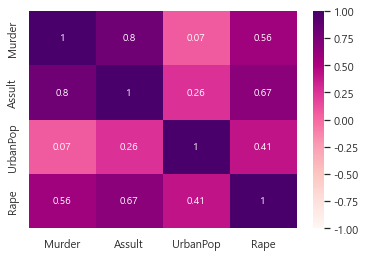

In [68]:
sns.heatmap(usarrests.corr(), cmap="RdPu", annot=True,
                    vmin = -1, vmax = 1,)

2. 상관 분석

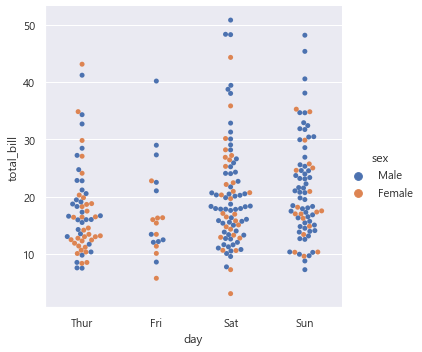

In [55]:
sns.catplot(x='day', y='total_bill', data=tips, kind='swarm', hue='sex')

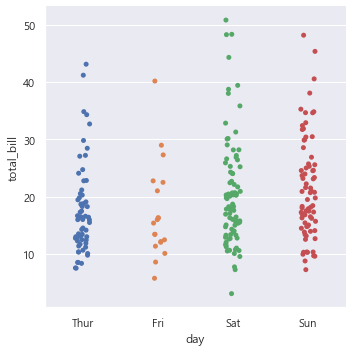

In [54]:
sns.catplot(x='day', y='total_bill', data=tips) 

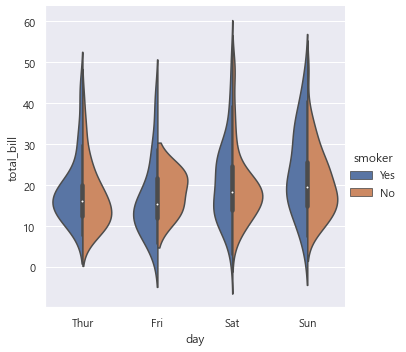

In [52]:
sns.catplot(x='day', y='total_bill', data=tips, kind='violin', hue='smoker', split=True)


In [25]:
# 전체 상관 관계
usarrests.corr()

,Murder,Assult,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assult,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


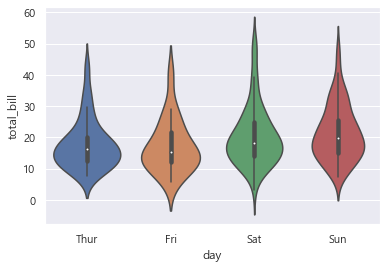

In [51]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.show()

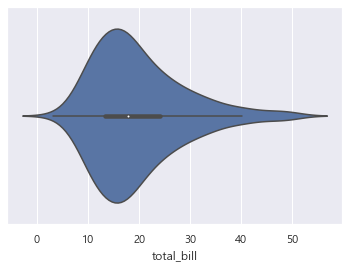

In [50]:
sns.violinplot(x=tips["total_bill"])
plt.show()

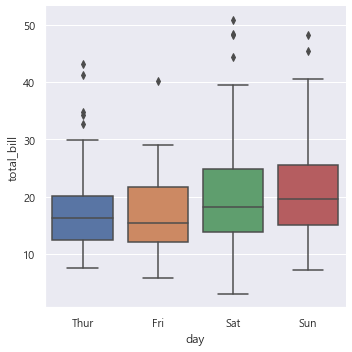

In [49]:
sns.catplot(x='day', y='total_bill', data=tips, kind='box') 

In [18]:
# 부분 상관 관계
usarrests.Murder.corr(usarrests.Assult)

0.80187331172494

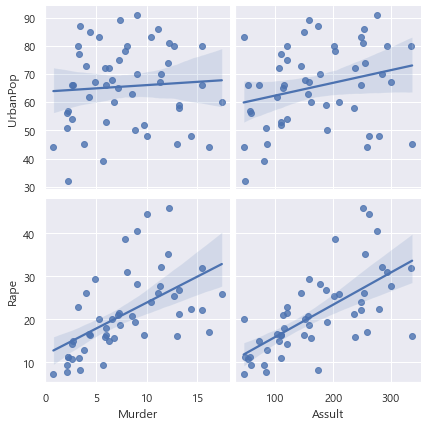

In [62]:
sns.pairplot(usarrests,x_vars=['Murder','Assult'],
             y_vars=['UrbanPop','Rape'], kind='reg', height=3)

# sns.pairplot(usarrests,x_vars=['인구수','CCTV'],
#              y_vars=['살인검거율','폭력검거율'],kind='reg',height=3)

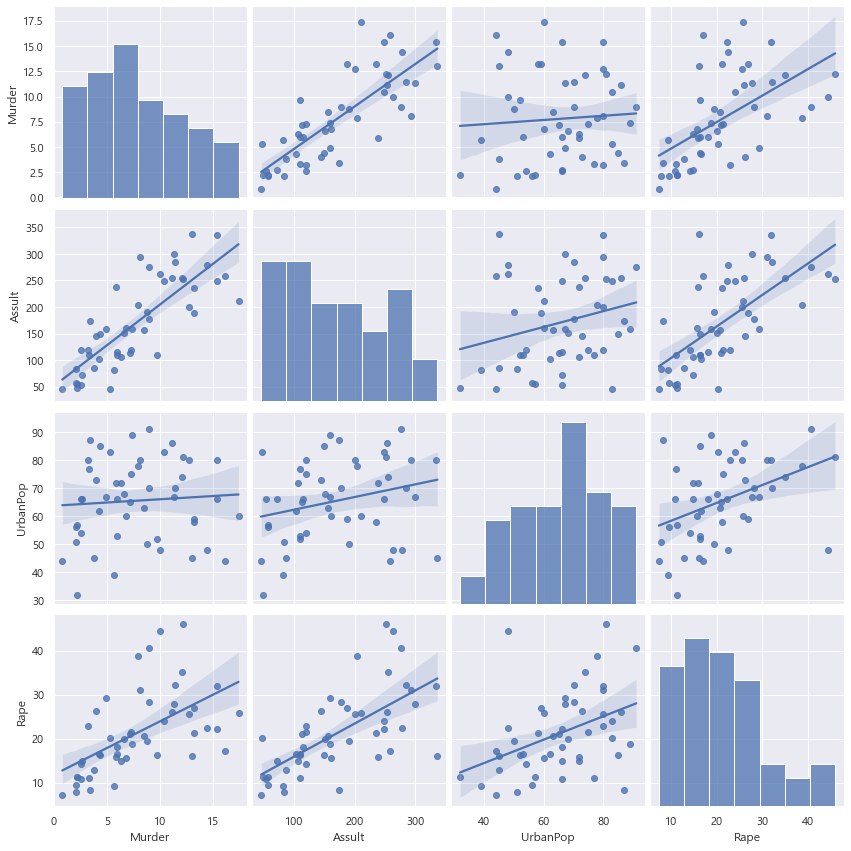

In [63]:
sns.pairplot(usarrests, kind='reg', height=3)

In [40]:
# Correlation Graph
def corr_plot(df, options='pairplot'):

    if options == 'pairplot':
        sns.pairplot(df)
        plt.show()
    elif options == 'heatmap':
        sns.heatmap(df.corr(), cmap="RdYlBu_r", annot=True
                    vmin = -1, vmax = 1,)
        plt.show()
    else:
        print('Check Options')        

C:\Users\joenjoy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


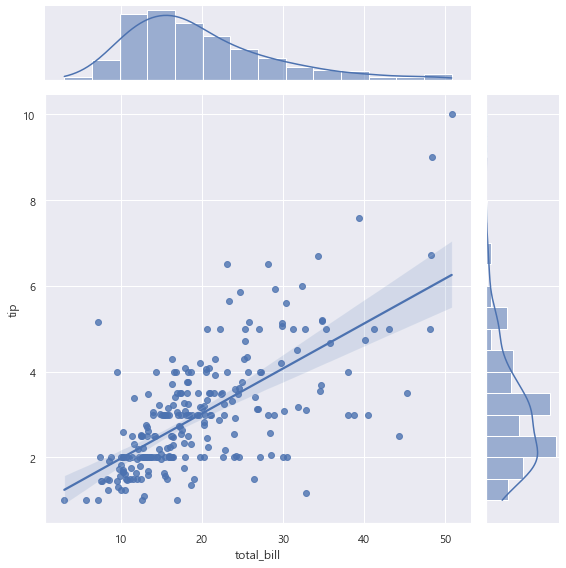

In [48]:
sns.jointplot("total_bill", "tip", height=8, data=tips, kind="reg")
plt.show()

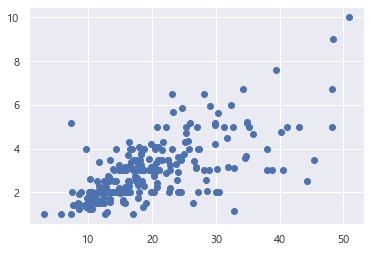

In [46]:
plt.scatter(tips.total_bill, tips.tip)
plt.show()

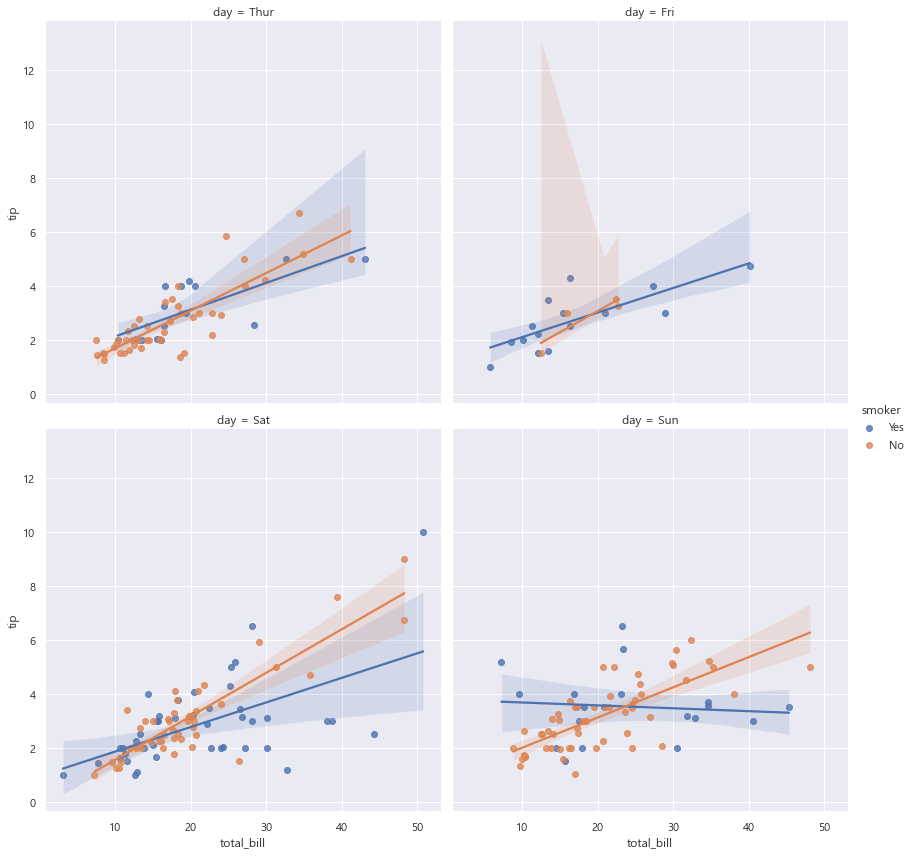

In [47]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='day', 
           col_wrap=2, height=6, data=tips)
plt.show()

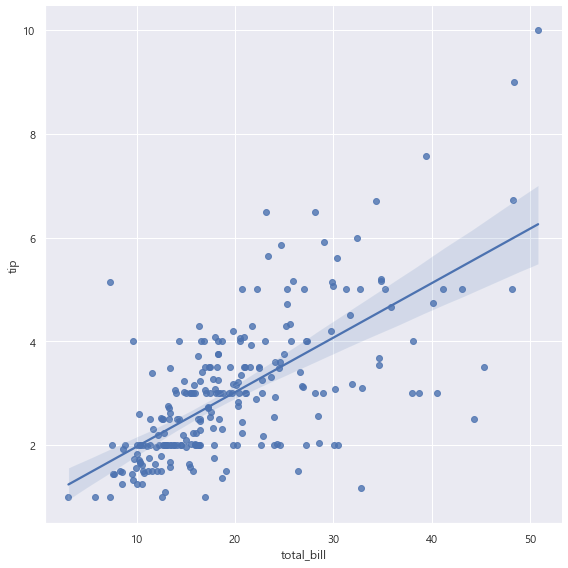

In [42]:
sns.lmplot(x="total_bill", y="tip", height=8, data=tips)
plt.show()

In [56]:
corr_plot(usarrests, 'pairplot')

TypeError: corr_plot() got an unexpected keyword argument 'height'

In [39]:
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
1) 정규성 검정
Kolmogorov-Smirnov와 shapiro-Wilk test
Q-Q plot

만족하지 못하면 변수변환을 한다.

box-cox 또은 로그변환

In [ ]:
corr_plot(usarrests, 'heatmap')

## 2) 표준화와 정규화

## 3). 변수축소 - 주성분 & 요인분석

| 주성분분석 | 요인분석 |
| --- | --- |
| 관찰기술(요인분석 유형) | 모델링 기술 |
| 최대 분산양 설명 | 데이터의 공분산을 설명 |
| 관측된 변수의 선형 조합 | 미관측 변수/요인 선형조합 |
| 구성요소 해석 불가 | 레이블링 및 해석 가능 |
| 차원 축소법 | 잠재변수 방법 |

### (1) 주성분분석

1. ADPLearn 모듈과 데이터를 로드

In [ ]:
swiss, _ = adp.loaddata('swiss')
swiss.head(3)

2. 데이터 표준정규화

In [ ]:
# 표준 정규화
scaled_df = adp.scaler(swiss, 'standard')
scaled_df.head(3)

3. 주성분분석 실행

In [ ]:
ncom, cev, loadings, pca_df = adp.pca(scaled_df, 0.85)

4. 주성분분석 결과 확인

In [ ]:
print('최적 요인 수: {}\n누적 성분 분산량: {:.3f}'.format(ncom, cev))

In [ ]:
loadings

In [ ]:
pca_df.head(5)

### (2) 요인분석

1. ADPLearn 모듈과 데이터를 로드

In [ ]:
swiss, _ = adp.loaddata('swiss')
swiss.head(3)

2. 데이터 표준정규화

In [ ]:
# 표준 정규화
scaled_df = adp.scaler(swiss, 'standard')
scaled_df.head(3)

3. 요인분석 적정성 검사
    - bartlett: 상관행렬이 항등행렬(변수간 관련이 없음)이라는 귀무가설 검정
    - kmo : 변수간 편상관(인자가 서로를 설명) 강도 조사, 1에 가까울 수록 유리

In [ ]:
test = ['bartlett', 'kmo']

for t in test:
    t_r, tr_pass = adp.test_fa(scaled_df, t)
    print('{} test: {}\n{}'.format(t, 'Pass' if tr_pass else 'Fail', t_r))

4. 요인분석 실행

In [ ]:
ncom, cev, loadings, fa_df = adp.factor_analysis(scaled_df, 0.85)

4. 요인분석 결과 확인
    - Cumulative Eigen Value : 전체 변수에 대한 설명력

In [ ]:
print('최적 요인 수: {}\n누적 아이젠 값: {:.3f}'.format(ncom, cev))

In [ ]:
loadings

In [ ]:
fa_df.head(5)

5. 요인분석 결과 검증
    - 크론바흐 알파: 주어진 변수들이 한개 그룹에 속할 수 있는지 내적일관성 측정, 0.7 이상이면 우수

In [1]:
t_r = adp.cronbach_alpha(scaled_df, loadings, 0.3)

NameError: name 'adp' is not defined